In [1]:
from src.data.dataset import RankineData
from src.models.LETKF import LETKF
data = RankineData(1)
model = LETKF()

In [2]:
data.make_obs(noise_flag=False)

{'u_x': array([  3.01082443,  12.89545692,   3.84967476,   0.59012919,
          7.71428571,   5.03449364,   2.76779449,  -0.43522031,
          3.14065282,   0.70148468,  -2.67374005,   5.94856269,
         -5.19111925,  -3.59991429,  -0.44243181,  15.9542069 ,
          2.38200284,   0.11098766,   3.11178906,  -3.03151817,
          0.77745784,   2.81428123,  10.11765629,   2.94368232,
         -0.0853936 ,   7.23454917,   1.23485871,  13.53568079,
         -1.01497152,   2.03688137,  -1.06558917,   3.92543123,
         21.83406445,   0.46740859,   8.96489312,  -0.50479886,
         18.98729792,   5.8077334 ,   5.08764389,   1.14779562,
          0.57931034,   1.28832683,  13.60936094,   4.14897973,
         -1.69009047,  -0.31877643,   5.66292135,  -0.34993471,
          5.31422423,  -6.97049526,   6.08439575,  25.34482759,
          7.24137931,   1.87054632,   5.76509013,  -1.07507659,
         -0.        ,  -0.33077463,  -0.77898144,  -4.48597407,
         -2.26022483,   1.0220324

In [2]:
model.calculate_R_inv()

In [10]:
data.xx

array([[ 0.,  1.,  2., ..., 88., 89., 90.],
       [ 0.,  1.,  2., ..., 88., 89., 90.],
       [ 0.,  1.,  2., ..., 88., 89., 90.],
       ...,
       [ 0.,  1.,  2., ..., 88., 89., 90.],
       [ 0.,  1.,  2., ..., 88., 89., 90.],
       [ 0.,  1.,  2., ..., 88., 89., 90.]])

In [11]:
data.yy

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 2.,  2.,  2., ...,  2.,  2.,  2.],
       ...,
       [88., 88., 88., ..., 88., 88., 88.],
       [89., 89., 89., ..., 89., 89., 89.],
       [90., 90., 90., ..., 90., 90., 90.]])

In [12]:
import numpy as np
xx, yy = data.xx, data.yy
num_points = 91
center = np.zeros((num_points, num_points, 2))
center[:,:,0] = xx
center[:,:,1] = yy
center = center.reshape(-1, 2)

In [26]:
sigma = 10
for i, (center_x, center_y) in enumerate(center[4500:4501]):
    print(center_x, center_y)
    distances = np.sqrt((xx - center_x)**2 + (yy - center_y)**2)        
    gaussian = model.localizescale(sigma, distances)
    


41.0 49.0


In [27]:
distances.shape

(91, 91)

In [29]:
print(gaussian.flatten().shape)

(8281,)


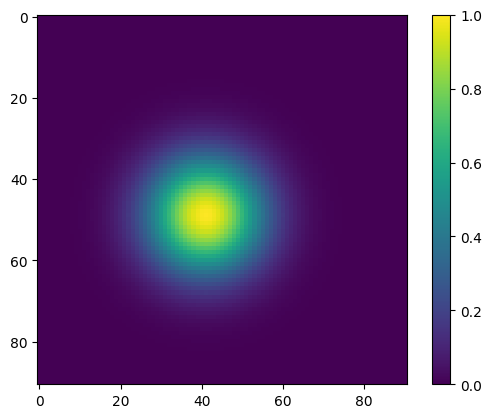

In [28]:
import matplotlib.pyplot as plt
plt.imshow(gaussian)
plt.colorbar()

In [8]:
model.make_localization_matrix(5)

(8281, 8281)


In [9]:
L_loc = model.L_loc

In [32]:
print(L_loc.shape)

(8281, 8281)


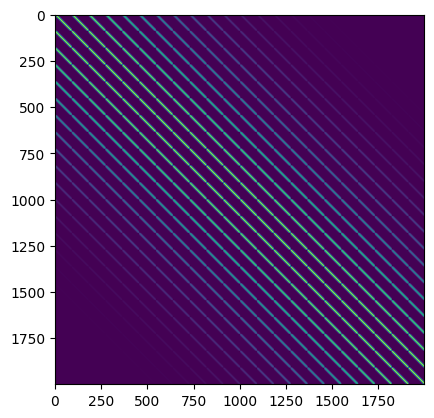

In [37]:
plt.imshow(L_loc[:2000,: 2000])

In [3]:
from numpy import linalg as LA
import  numpy as np
R = np.eye(91*91)*(3**2)
R_inv = LA.inv(R)




In [10]:
for j in range(91*91):
    R_inv[j][j] = R_inv[j][j] * L_loc[0][j]

In [41]:
flatten_obs_points = model.flatten_obs_points()

[  3  16  37  66  73 109 178 188 237 471]


In [42]:
flatten_obs_points.shape

(200,)

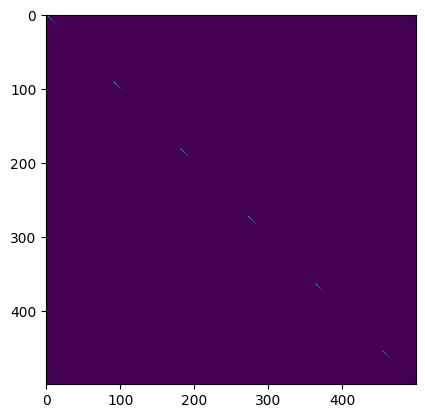

In [40]:
plt.imshow(R_inv[:500,:500])

In [43]:
n_obs = 200
R_inv_sensitive = np.zeros((n_obs, n_obs))
for j in range(n_obs):
    R_inv_sensitive[j][j] = R_inv[flatten_obs_points[j]][flatten_obs_points[j]]

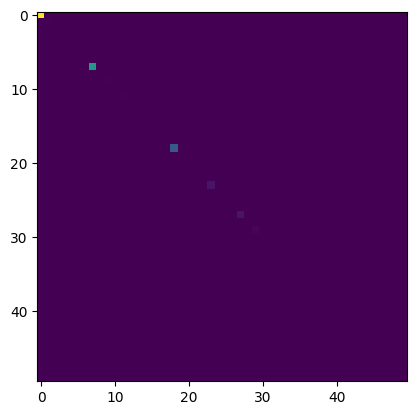

In [45]:
plt.imshow(R_inv_sensitive[:50,:50])

[  3  16  37  66  73 109 178 188 237 471]


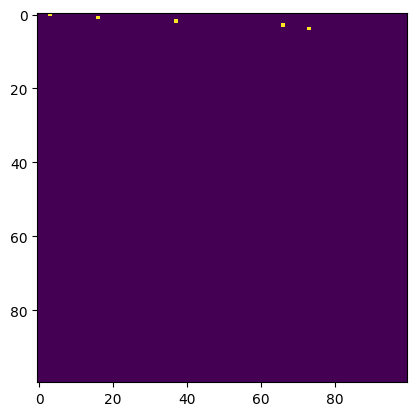

In [47]:
model.make_observation_matrix()
H = model.H
plt.imshow(H[:100, :100])

In [53]:
x_u = data.windvalues_prior['u_x']
x_v = data.windvalues_prior['u_y']
u = np.sqrt(x_u**2 + x_v**2)

In [54]:
print(x_u.shape)

(60, 91, 91)


In [1]:
R_inv = LA.inv(R)

NameError: name 'LA' is not defined

In [59]:
R_inv = LA.inv(R)
R_inv = np.diag(np.diagonal(R_inv) * L_loc)

KeyboardInterrupt: 

In [58]:
R_inv.shape

(8281,)

In [57]:
plt.imshow(R_inv[:500,:500])  

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

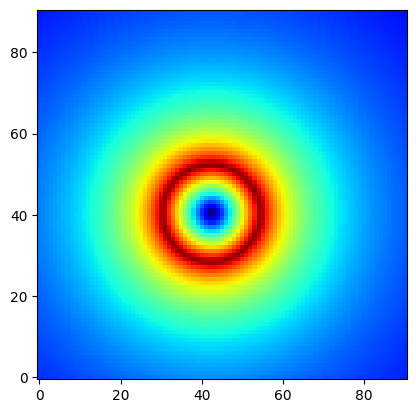

In [55]:
plt.imshow(u[0], cmap='jet', origin='lower')

In [48]:
H.shape

(200, 8281)

In [8]:
center.shape

(8281, 2)

In [5]:
obs_points = data.obs_points

In [10]:
import numpy as np
# First, sort by the second dimension
sorted_indices = np.lexsort((obs_points[:, 0], obs_points[:, 1]))

# Use the sorted indices to sort the array
sorted_obs_points = obs_points[sorted_indices]

print("\nSorted obs_points:\n", sorted_obs_points)


Sorted obs_points:
 [[ 3  0]
 [16  0]
 [37  0]
 [66  0]
 [73  0]
 [18  1]
 [87  1]
 [ 6  2]
 [55  2]
 [16  5]
 [49  5]
 [15  6]
 [19  7]
 [30  7]
 [31  7]
 [36  7]
 [67  7]
 [69  7]
 [ 3  8]
 [72  8]
 [40  9]
 [44  9]
 [51 10]
 [ 6 11]
 [21 11]
 [83 11]
 [89 11]
 [ 3 12]
 [29 12]
 [ 7 13]
 [35 13]
 [27 14]
 [50 15]
 [ 1 17]
 [ 8 17]
 [20 17]
 [30 17]
 [16 18]
 [29 18]
 [81 18]
 [88 18]
 [39 19]
 [52 19]
 [60 19]
 [48 20]
 [ 2 21]
 [48 21]
 [65 21]
 [68 21]
 [56 22]
 [83 22]
 [ 1 23]
 [ 3 23]
 [45 23]
 [53 23]
 [64 23]
 [ 3 26]
 [10 26]
 [19 26]
 [36 26]
 [63 26]
 [70 26]
 [47 27]
 [53 27]
 [47 28]
 [21 29]
 [36 29]
 [37 29]
 [51 29]
 [57 30]
 [71 30]
 [32 31]
 [90 31]
 [43 33]
 [17 34]
 [63 34]
 [68 34]
 [60 35]
 [73 35]
 [20 36]
 [26 36]
 [80 36]
 [ 7 37]
 [31 38]
 [63 38]
 [46 40]
 [54 40]
 [10 42]
 [52 42]
 [77 42]
 [ 0 43]
 [15 43]
 [34 43]
 [42 43]
 [13 45]
 [19 45]
 [21 45]
 [10 47]
 [33 47]
 [59 47]
 [ 9 48]
 [11 48]
 [55 48]
 [86 48]
 [52 49]
 [41 50]
 [ 5 51]
 [22 51]
 [55 52

In [1]:
# (60,91,91)のnumpy配列を作成
import numpy as np
a = np.zeros((60, 91, 91))
a_mean = np.mean(a, axis=0)
print(a_mean.shape)

(91, 91)


In [2]:
from src.data.dataset import RankineData
ensemble_size = 60

data = RankineData(1)
x_u, x_v = data.windvalues_prior['u_x'], data.windvalues_prior['u_y']
x_u, x_v = x_u.reshape(ensemble_size, -1), x_v.reshape(ensemble_size, -1)
xb_mean_u = np.mean(x_u, axis=0)
xb_mean_v = np.mean(x_v, axis=0)
dXb_u = (x_u - xb_mean_u).T
dXb_v = (x_v - xb_mean_v).T

In [3]:
print(x_u.shape)
print(xb_mean_u.shape)
print(dXb_u.shape)

(60, 91, 91)
(91, 91)
(91, 91, 60)
